In [1]:
import os
import sys
from wayne_utils import load_data, save_data
_ROOT_PATH = "/home/jiangpeiwen2/jiangpeiwen2/projects/TKGT"
sys.path.insert( 0, _ROOT_PATH )
_Data_path = os.path.join( _ROOT_PATH, "data/CPL/dynamic")
version_dir = os.path.join( _ROOT_PATH, "test/CPL_dynamic/v1")

prefix_list = []
for entity in [ "法院", "原告", "被告"]:
    for field in [ "姓名名称", "借款凭证", "约定的借款金额", "约定的还款日期或借款期限", "约定的利息", "约定的逾期利息", "约定的违约金"]:
        if entity == "被告" and field != "姓名名称":
            continue
        if field == "姓名名称":
            prefix_list.append( entity )
        else:
            pre = "法院裁定_" if entity == "法院" else "原告诉称_"
            prefix_list.append( pre+ field)
prefix_list

['法院',
 '法院裁定_借款凭证',
 '法院裁定_约定的借款金额',
 '法院裁定_约定的还款日期或借款期限',
 '法院裁定_约定的利息',
 '法院裁定_约定的逾期利息',
 '法院裁定_约定的违约金',
 '原告',
 '原告诉称_借款凭证',
 '原告诉称_约定的借款金额',
 '原告诉称_约定的还款日期或借款期限',
 '原告诉称_约定的利息',
 '原告诉称_约定的逾期利息',
 '原告诉称_约定的违约金',
 '被告']

In [7]:
def get_number( line, prompt):
    if "：[]" in prompt:
        return 0
    for i in range( 6):
        if str(i) in line:
            return i
    return 0

In [14]:
model_list = [
    "ChatGLM3-6B",
    "Qwen1.5-7B-Chat",
    "Chinese-Mistral-7B-Instruct-v0.1",
    "Baichuan2-7B-Chat",
    "Qwen2.5-0.5B",
    "CPL_dynamic_counter_ChatGLM3-6B-3epoch",
    "CPL_dynamic_counter_Qwen1.5-7B-Chat-3epoch",
    "CPL_dynamic_counter_Chinese-Mistral-7B-Instruct-v0.1-3epoch",
    "CPL_dynamic_counter_Chinese-Mistral-7B-Instruct-v0.1-3epoch_no_rag",
    "CPL_dynamic_counter_Chinese-Mistral-7B-Instruct-v0.1-3epoch_hybrid_rag"
]
scopes = model_list
scopes

['ChatGLM3-6B',
 'Qwen1.5-7B-Chat',
 'Chinese-Mistral-7B-Instruct-v0.1',
 'Baichuan2-7B-Chat',
 'Qwen2.5-0.5B',
 'CPL_dynamic_counter_ChatGLM3-6B-3epoch',
 'CPL_dynamic_counter_Qwen1.5-7B-Chat-3epoch',
 'CPL_dynamic_counter_Chinese-Mistral-7B-Instruct-v0.1-3epoch',
 'CPL_dynamic_counter_Chinese-Mistral-7B-Instruct-v0.1-3epoch_no_rag',
 'CPL_dynamic_counter_Chinese-Mistral-7B-Instruct-v0.1-3epoch_hybrid_rag']

In [13]:
from evaluation.CountCPL.evaluate import Eval
version_dir = "/home/jiangpeiwen2/jiangpeiwen2/projects/TKGT/test/CPL_static/v2_dynamic_baseline"
for model_name in scopes:
    predict_list = load_data( os.path.join( version_dir, f"counter_predict_list_{model_name}.pickle"), "pickle")
    prompt_list = load_data( os.path.join( version_dir, "counter_prompt_list.pickle"), "pickle")    # 111
    label_count_list = load_data( os.path.join( _ROOT_PATH, "evaluation/CountCPL/label_count_list_test.json"), "json")
    predict_count_list = []
    for i in range(len(predict_list)):
        temp_dict = {}
        predicts = predict_list[i]
        prompts = prompt_list[i]
        if len(predicts) != len(prefix_list):
            raise Exception( f"预测结果长度不对{len(predicts)}")
        for j in range( len(predicts)):
            temp_dict[prefix_list[j]] = get_number( predicts[j], prompts[j] )
        predict_count_list.append( temp_dict )
    save_data( predict_count_list, os.path.join( version_dir, f"counter_predict_list_final_{model_name}.pickle"))
    
    aadf, error_rate = Eval( predict_count_list, label_count_list )
    print( model_name )
    print( aadf.describe().loc["mean"])

test 211 tables for sss
Error rate = 26.540284360189574 34.20221169036335 57.74091627172196 42.08530805687204
ChatGLM3-6B
Easy-RMSE       0.443976
Easy-MAE        0.210900
Easy-EM        63.270142
Medium-RMSE     0.419424
Medium-MAE      0.209321
Medium-EM      67.101106
Hard-RMSE       0.642716
Hard-MAE        0.342812
Hard-EM        78.870458
AVG-RMSE        0.587745
AVG-MAE         0.263033
AVG-EM         71.042654
Name: mean, dtype: float64
test 211 tables for sss
Error rate = 4.739336492890995 21.248025276461295 31.1216429699842 21.895734597156398
Qwen1.5-7B-Chat
Easy-RMSE       0.055778
Easy-MAE        0.023697
Easy-EM        52.369668
Medium-RMSE     0.269579
Medium-MAE      0.115324
Medium-EM      60.624013
Hard-RMSE       0.389793
Hard-MAE        0.180885
Hard-EM        65.560821
AVG-RMSE        0.354701
AVG-MAE         0.123223
AVG-EM         60.947867
Name: mean, dtype: float64
test 211 tables for sss
Error rate = 2.0537124802527646 48.1042654028436 46.52448657187994 38.2622

In [6]:
(0.479)** 2 * 16 / 30

0.12236853333333332

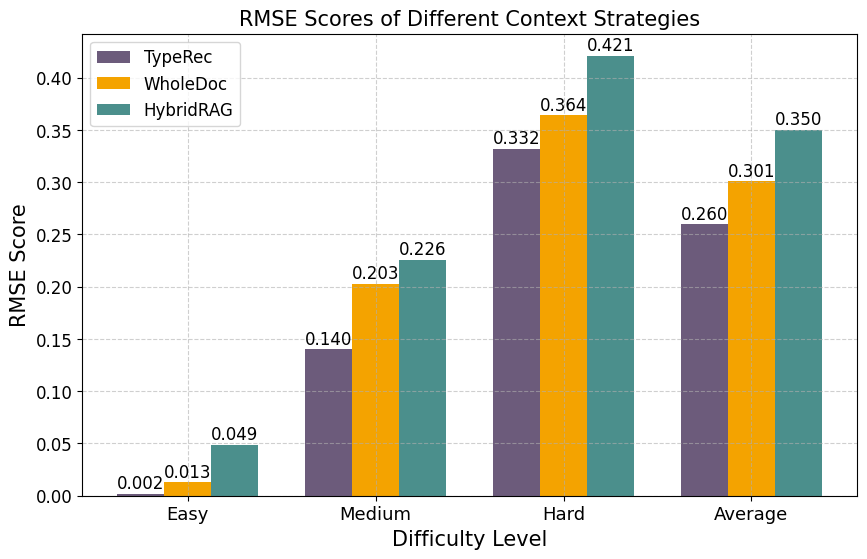

In [35]:
import matplotlib.pyplot as plt
import numpy as np
# RMSE 数据
RMSE = {
    "Easy": {
        "TypeRec": 0.002,
        "WholeDoc": 0.013,
        "HybridRAG": 0.049
    },
    "Medium": {
        "TypeRec": 0.140,
        "WholeDoc": 0.203,
        "HybridRAG": 0.226
    },
    "Hard": {
        "TypeRec": 0.332,
        "WholeDoc": 0.364,
        "HybridRAG": 0.421
    },
    "Average": {
        "TypeRec": 0.260,
        "WholeDoc": 0.301,
        "HybridRAG": 0.350
    }
}

# 提取横轴标签和数据
x_labels = list(RMSE.keys())
methods = ["TypeRec", "WholeDoc", "HybridRAG"]

# 设置每个难度的柱子位置
x_pos = np.arange(len(x_labels))

# 设置柱宽度
bar_width = 0.25

# 绘制分组柱状图
plt.figure(figsize=(10, 6))

# 更新配色
colors = ["#6C5B7B", "#F4A300", "#4B8F8C"]  # 更优雅的配色方案

for i, method in enumerate(methods):
    y_values = [RMSE[difficulty][method] for difficulty in x_labels]
    bars = plt.bar(x_pos + i * bar_width, y_values, bar_width, label=method, color=colors[i])
    
    # 在每个柱状图上标注数值
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.001, f"{height:.3f}",
                 ha='center', va='bottom', fontsize=12, color='black')

# 设置横轴标签和标题
plt.xlabel("Difficulty Level", fontsize=15)
plt.ylabel("RMSE Score", fontsize=15)
plt.title("RMSE Scores of Different Context Strategies", fontsize=15)

# 调整横轴标签的位置，避免重叠
plt.xticks(x_pos + bar_width, x_labels, fontsize=13)  # 设置x轴标签字体大小
plt.yticks(fontsize=12)  # 设置y轴数值字体大小
# 图表美化
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# 保存图片
plt.savefig("rmse_plot_with_values.pdf", dpi=600, bbox_inches='tight')
plt.show()
